In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score

def regression_results(y_true, y_pred, regr_type):

    # Regression metrics
    ev = explained_variance_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred) 
    mse = mean_squared_error(y_true, y_pred) 
    r2 = r2_score(y_true, y_pred)
    
    print('Evaluation metrics for ' + regr_type + ' Linear Regression')
    print('explained_variance: ',  round(ev,4)) 
    print('r2: ', round(r2,4))
    print('MAE: ', round(mae,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))
    print()

In [3]:
noise=1
np.random.seed(42)
X = 2 * np.random.rand(1000, 1)
y = 4 + 3 * X + noise*np.random.randn(1000, 1)
y_ideal =  4 + 3 * X
y_outlier = pd.Series(y.reshape(-1).copy())


threshold = 1.5  # Example threshold to add outliers for larger feature values
outlier_indices = np.where(X.flatten() > threshold)[0]


num_outliers = 5
selected_indices = np.random.choice(outlier_indices, num_outliers, replace=False)

y_outlier[selected_indices] += np.random.uniform(50, 100, num_outliers)

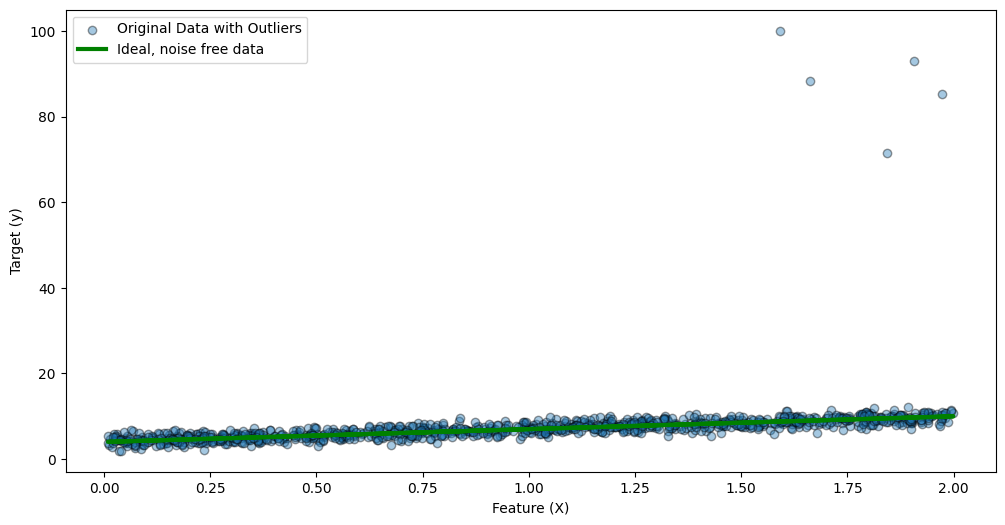

In [4]:
plt.figure(figsize=(12, 6))

# Scatter plot of the original data with outliers
plt.scatter(X, y_outlier, alpha=0.4,ec='k', label='Original Data with Outliers')
plt.plot(X, y_ideal,  linewidth=3, color='g',label='Ideal, noise free data')

plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.title('')
plt.legend()
plt.show()

In [5]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Fit a simple linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X, y_outlier)
y_outlier_pred_lin = lin_reg.predict(X)

# Fit a ridge regression model (regularization to control large coefficients)
ridge_reg = Ridge(alpha=1)
ridge_reg.fit(X, y_outlier)
y_outlier_pred_ridge = ridge_reg.predict(X)

# Fit a lasso regression model (regularization to control large coefficients)
lasso_reg = Lasso(alpha=.2)
lasso_reg.fit(X, y_outlier)
y_outlier_pred_lasso = lasso_reg.predict(X)

In [6]:
regression_results(y, y_outlier_pred_lin, 'Ordinary')
regression_results(y, y_outlier_pred_ridge, 'Ridge')
regression_results(y, y_outlier_pred_lasso, 'Lasso')

Evaluation metrics for Ordinary Linear Regression
explained_variance:  0.6748
r2:  0.6357
MAE:  0.9468
MSE:  1.4164
RMSE:  1.1901

Evaluation metrics for Ridge Linear Regression
explained_variance:  0.6766
r2:  0.6375
MAE:  0.9443
MSE:  1.4094
RMSE:  1.1872

Evaluation metrics for Lasso Linear Regression
explained_variance:  0.7394
r2:  0.7003
MAE:  0.8597
MSE:  1.1651
RMSE:  1.0794



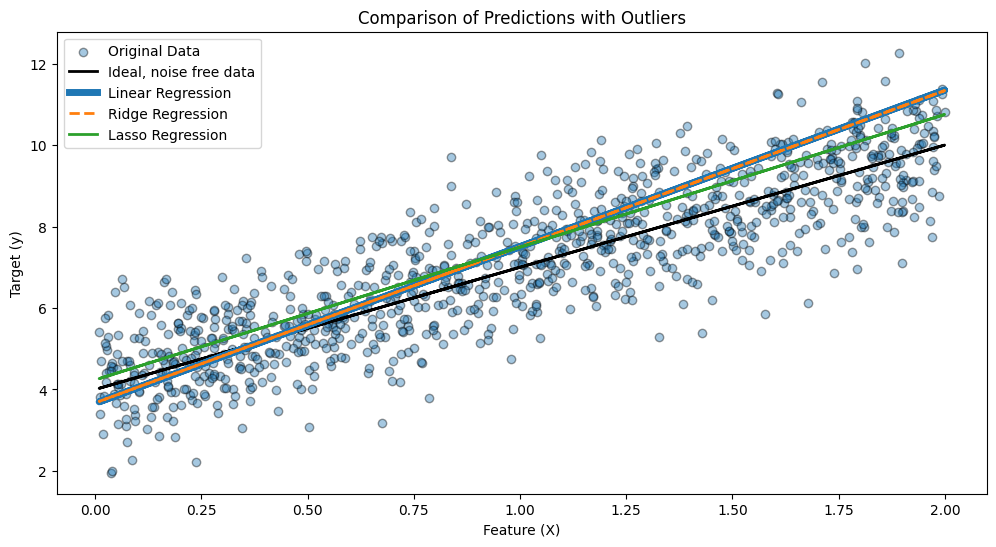

In [7]:
plt.figure(figsize=(12, 6))

# Scatter plot of the original data with outliers
plt.scatter(X, y, alpha=0.4,ec='k', label='Original Data')

# Plot the ideal regression line (noise free data)
plt.plot(X, y_ideal,  linewidth=2, color='k',label='Ideal, noise free data')

# Plot predictions from the simple linear regression model
plt.plot(X, y_outlier_pred_lin,  linewidth=5, label='Linear Regression')

# Plot predictions from the ridge regression model
plt.plot(X, y_outlier_pred_ridge, linestyle='--', linewidth=2, label='Ridge Regression')

# Plot predictions from the lasso regression model
plt.plot(X, y_outlier_pred_lasso,  linewidth=2, label='Lasso Regression')

plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.title('Comparison of Predictions with Outliers')
plt.legend()
plt.show()